# Primary Contributary Causes of Road Accidents in Chicago

### Overview

In big and burgeoning urban centers, traffic safety is of paramount importance because of its significant impact on human lives and city resources. In a big city like Chicago, its crucial to analyse existing data on road accidents to establish patterns and address the leading contributary causes of road accidents.



By developing multiple models, various stakeholders like the Vehicle Safety Board would be able to determine the main contributary factors to road accidents and implement policies that will increase road safety.



### Problem Statement



This project aims to conduct a thorough analysis of traffic crashes in the city of Chicago, utilizing multiple modeling techniques. The primary goal is to uncover insights into the factors influencing traffic accidents in Chicago, and suggest proactive measures to reduce traffic accidents.





### Stake Holders



This project targets a diverse audience:



- **Vehicle Safety Board**: 



- **City planners and traffic engineers**:  



## Objectives:



1. **Identify the most significant contributing factors to road accidents in Chicago:**

   

2. **Provide insights into patterns and trends to help stakeholders implement targeted interventions to reduce road accidents:**

   

3. **Develop a Model based on metrics that address the predictors for road accidents the best:**

   

## Data Understanding

We've used three datasets from the City of Chicago:



1. **Crashes dataset:** Crashes dataset shows information about each traffic crash on city streets within the City of Chicago limits and under the jurisdiction of Chicago Police Department (CPD).



2. **People dataset:** This dataset contains information about people involved in a crash and if any injuries were sustained. Each record corresponds to an occupant in a vehicle listed in the Crash dataset.



3. **Vehicles dataset:** This dataset contains information about vehicles (or units as they are identified in crash reports) involved in a traffic crash. “Vehicle” information includes motor vehicle and non-motor vehicle modes of transportation, such as bicycles and pedestrians.






### Exploratory Data Analysis

#### Library Imports

In [4]:
#import files

import pandas as pd

import numpy as np



import matplotlib.pyplot as plt

import seaborn as sns



from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV

from imblearn.over_sampling import SMOTE 

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

from scipy import stats

from sklearn.impute import KNNImputer

# from sklearn.tree import DecisionTreeClassifier

# from sklearn.ensemble import RandomForestClassifier

# from sklearn.linear_model import LogisticRegression

#### 1. Traffic crashes dataset 

##### Load the traffic crashes dataset from City of Chicago.

In [5]:
# Load the data into a dataframe and read the first five rows

crashes_df = pd.read_csv('./data/Traffic_Crashes_-_Crashes_20241008.csv')

crashes_df.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN


In [6]:
# Get the number of rows and columns in the dataset

crashes_df.shape

(880654, 48)

Dataset has 880654 rows and 48 columns

In [7]:
# Lists the columns in crashes dataset

crashes_df.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

Check the data type held by each column and number of non-null values below

In [8]:
# Lists out column names data types and non-null count for the columns

crashes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880654 entries, 0 to 880653
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                880654 non-null  object 
 1   CRASH_DATE_EST_I               65255 non-null   object 
 2   CRASH_DATE                     880654 non-null  object 
 3   POSTED_SPEED_LIMIT             880654 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         880654 non-null  object 
 5   DEVICE_CONDITION               880654 non-null  object 
 6   WEATHER_CONDITION              880654 non-null  object 
 7   LIGHTING_CONDITION             880654 non-null  object 
 8   FIRST_CRASH_TYPE               880654 non-null  object 
 9   TRAFFICWAY_TYPE                880654 non-null  object 
 10  LANE_CNT                       199017 non-null  float64
 11  ALIGNMENT                      880654 non-null  object 
 12  ROADWAY_SURFACE_COND          

Check percentage of null values in each column of the dataset.

In [9]:
# Function that calculates the percentage of null values in every column and displays the series.

def null_percentages(df):

    return df.isnull().sum() / len(df) * 100


In [10]:
# Check null values in the crashes dataset

null_percentages(crashes_df)

CRASH_RECORD_ID                   0.000000
CRASH_DATE_EST_I                 92.590166
CRASH_DATE                        0.000000
POSTED_SPEED_LIMIT                0.000000
TRAFFIC_CONTROL_DEVICE            0.000000
DEVICE_CONDITION                  0.000000
WEATHER_CONDITION                 0.000000
LIGHTING_CONDITION                0.000000
FIRST_CRASH_TYPE                  0.000000
TRAFFICWAY_TYPE                   0.000000
LANE_CNT                         77.401227
ALIGNMENT                         0.000000
ROADWAY_SURFACE_COND              0.000000
ROAD_DEFECT                       0.000000
REPORT_TYPE                       3.071808
CRASH_TYPE                        0.000000
INTERSECTION_RELATED_I           77.062615
NOT_RIGHT_OF_WAY_I               95.431009
HIT_AND_RUN_I                    68.641033
DAMAGE                            0.000000
DATE_POLICE_NOTIFIED              0.000000
PRIM_CONTRIBUTORY_CAUSE           0.000000
SEC_CONTRIBUTORY_CAUSE            0.000000
STREET_NO  

##### Data cleaning

First, we'll drop columns with more than 75% of the data missing

In [11]:
# Function that drops columns from a DataFrame that have a null value percentage higher than the specified value in optional parameter (threshold).

def drop_highnull_columns(df, threshold=75):



  # Calculate the percentage of null values in each column

  null_percentages = (df.isnull().sum() / len(df)) * 100



  # Identify columns to drop

  columns_to_drop = null_percentages[null_percentages > threshold].index



  # Drop the identified columns

  df = df.drop(columns=columns_to_drop, axis=1)



  return df

In [12]:
# Implement drop_highnull_columns function on the crashes_df dataset

crashes_df_droppedna = drop_highnull_columns(crashes_df)

crashes_df_droppedna.shape

(880654, 38)

The new dataset(crashes_df_dropped) now has 38 columns from the original 48.

In [13]:
# Check the remaining null values in the dataset

null_percentages(crashes_df_droppedna)

CRASH_RECORD_ID                   0.000000
CRASH_DATE                        0.000000
POSTED_SPEED_LIMIT                0.000000
TRAFFIC_CONTROL_DEVICE            0.000000
DEVICE_CONDITION                  0.000000
WEATHER_CONDITION                 0.000000
LIGHTING_CONDITION                0.000000
FIRST_CRASH_TYPE                  0.000000
TRAFFICWAY_TYPE                   0.000000
ALIGNMENT                         0.000000
ROADWAY_SURFACE_COND              0.000000
ROAD_DEFECT                       0.000000
REPORT_TYPE                       3.071808
CRASH_TYPE                        0.000000
HIT_AND_RUN_I                    68.641033
DAMAGE                            0.000000
DATE_POLICE_NOTIFIED              0.000000
PRIM_CONTRIBUTORY_CAUSE           0.000000
SEC_CONTRIBUTORY_CAUSE            0.000000
STREET_NO                         0.000000
STREET_DIRECTION                  0.000454
STREET_NAME                       0.000114
BEAT_OF_OCCURRENCE                0.000568
NUM_UNITS  

__Next, Select features/columns that are important and non-repetitive__

In [14]:
# Select the most important features.

crashes_df_dropped = crashes_df_droppedna[['CRASH_RECORD_ID', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 

                                          'ROADWAY_SURFACE_COND', 'ROAD_DEFECT','CRASH_TYPE', 'DAMAGE',

                                           'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'CRASH_HOUR',

                                           'CRASH_DAY_OF_WEEK', 'LATITUDE', 'LONGITUDE']]

crashes_df_dropped.shape

(880654, 13)

##### Selected features:



* `CRASH_RECORD_ID` This number can be used to link to the same crash in the Vehicles and People datasets. This number also serves as a unique ID in this dataset.

* `WEATHER_CONDITION` Weather condition at time of crash, as determined by reporting officer

* `LIGHTING_CONDITION` Light condition at time of crash, as determined by reporting officer

* `ROADWAY_SURFACE_COND` Road surface condition, as determined by reporting officer

* `ROAD_DEFECT` Road defects, as determined by reporting officer

* `CRASH_TYPE` A general severity classification for the crash. Can be either Injury and/or Tow Due to Crash or No Injury / Drive Away

* `DAMAGE` - A field observation of estimated value damage.

* `PRIM_CONTRIBUTORY_CAUSE` The factor which was most significant in causing the crash, as determined by officer judgment

* `SEC_CONTRIBUTORY_CAUSE` The factor which was second most significant in causing the crash, as determined by officer judgment

* `CRASH_HOUR` The hour of the day component of CRASH_DATE.

* `CRASH_DAY_OF_WEEK` The day of the week component of CRASH_DATE. Sunday=1

* `LONGITUDE` and `LATITUDE` - The crash location, as determined by reporting officer, 

#### 2. Vehicles dataset 

##### Load the traffic crashes dataset from City of Chicago.

In [15]:
vehicles_df = pd. read_csv('./Data/Traffic_Crashes_-_Vehicles_20241008.csv')

vehicles_df.head()

<ipython-input-15-9dff55cf762d>:1: DtypeWarning: Columns (20,39,40,41,43,47,48,49,52,54,57,58,59,60,70) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicles_df = pd. read_csv('./Data/Traffic_Crashes_-_Vehicles_20241008.csv')


,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,MODEL,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,1717556,7b1763088507f77e0e552c009a6bf89a4d6330c7527706...,12/06/2023 03:24:00 PM,1,DRIVER,NaN,1634931.0,NaN,NISSAN,SENTRA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1717574,2603ff5a88f0b9b54576934c5ed4e4a64e8278e005687b...,12/06/2023 04:00:00 PM,2,DRIVER,NaN,1634978.0,NaN,CHRYSLER,SEBRING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1717579,a52ef70e33d468b855b5be44e8638a564434dcf99c0edf...,12/06/2023 04:30:00 PM,1,DRIVER,NaN,1634948.0,NaN,SUBARU,OUTBACK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1720118,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,12/10/2023 12:12:00 PM,1,DRIVER,NaN,1637401.0,NaN,TOYOTA,RAV4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1720119,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,12/10/2023 12:12:00 PM,2,DRIVER,NaN,1637408.0,NaN,SUBARU,OUTBACK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Get the number of rows and columns in the dataset

vehicles_df.shape

(1796451, 71)

Dataset has 1796451 rows and 71 columns

In [17]:
# Lists the columns in vehicles dataset

vehicles_df.columns

Index(['CRASH_UNIT_ID', 'CRASH_RECORD_ID', 'CRASH_DATE', 'UNIT_NO',
       'UNIT_TYPE', 'NUM_PASSENGERS', 'VEHICLE_ID', 'CMRC_VEH_I', 'MAKE',
       'MODEL', 'LIC_PLATE_STATE', 'VEHICLE_YEAR', 'VEHICLE_DEFECT',
       'VEHICLE_TYPE', 'VEHICLE_USE', 'TRAVEL_DIRECTION', 'MANEUVER',
       'TOWED_I', 'FIRE_I', 'OCCUPANT_CNT', 'EXCEED_SPEED_LIMIT_I', 'TOWED_BY',
       'TOWED_TO', 'AREA_00_I', 'AREA_01_I', 'AREA_02_I', 'AREA_03_I',
       'AREA_04_I', 'AREA_05_I', 'AREA_06_I', 'AREA_07_I', 'AREA_08_I',
       'AREA_09_I', 'AREA_10_I', 'AREA_11_I', 'AREA_12_I', 'AREA_99_I',
       'FIRST_CONTACT_POINT', 'CMV_ID', 'USDOT_NO', 'CCMC_NO', 'ILCC_NO',
       'COMMERCIAL_SRC', 'GVWR', 'CARRIER_NAME', 'CARRIER_STATE',
       'CARRIER_CITY', 'HAZMAT_PLACARDS_I', 'HAZMAT_NAME', 'UN_NO',
       'HAZMAT_PRESENT_I', 'HAZMAT_REPORT_I', 'HAZMAT_REPORT_NO',
       'MCS_REPORT_I', 'MCS_REPORT_NO', 'HAZMAT_VIO_CAUSE_CRASH_I',
       'MCS_VIO_CAUSE_CRASH_I', 'IDOT_PERMIT_NO', 'WIDE_LOAD_I',
       'TRAILER1_

Check the data type held by each column and number of non-null values below

In [18]:
# Lists out column names data types and non-null count for the columns

vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796451 entries, 0 to 1796450
Data columns (total 71 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   CRASH_UNIT_ID             int64  
 1   CRASH_RECORD_ID           object 
 2   CRASH_DATE                object 
 3   UNIT_NO                   int64  
 4   UNIT_TYPE                 object 
 5   NUM_PASSENGERS            float64
 6   VEHICLE_ID                float64
 7   CMRC_VEH_I                object 
 8   MAKE                      object 
 9   MODEL                     object 
 10  LIC_PLATE_STATE           object 
 11  VEHICLE_YEAR              float64
 12  VEHICLE_DEFECT            object 
 13  VEHICLE_TYPE              object 
 14  VEHICLE_USE               object 
 15  TRAVEL_DIRECTION          object 
 16  MANEUVER                  object 
 17  TOWED_I                   object 
 18  FIRE_I                    object 
 19  OCCUPANT_CNT              float64
 20  EXCEED_SPEED_LIMIT_I    

Check percentage of null values in each column of the dataset.

In [19]:
# # Check null values in the vehicles dataset

null_percentages(vehicles_df)

CRASH_UNIT_ID               0.000000
CRASH_RECORD_ID             0.000000
CRASH_DATE                  0.000000
UNIT_NO                     0.000000
UNIT_TYPE                   0.123800
                             ...    
CARGO_BODY_TYPE            99.201203
LOAD_TYPE                  99.236495
HAZMAT_OUT_OF_SERVICE_I    99.301957
MCS_OUT_OF_SERVICE_I       99.288876
HAZMAT_CLASS               99.935985
Length: 71, dtype: float64

##### Data cleaning

First, we'll drop columns with more than 75% of the data missing

In [20]:
# Implement drop_highnull_columns function on the vehicles dataset

vehicles_df_droppedna = drop_highnull_columns(vehicles_df)

vehicles_df_droppedna.shape

(1796451, 18)

The new dataset(vehicles_df_droppedna) now has 18 columns from the original 71 columns.

In [21]:
# Check the remaining null values in the dataset

null_percentages(vehicles_df_droppedna)

CRASH_UNIT_ID           0.000000
CRASH_RECORD_ID         0.000000
CRASH_DATE              0.000000
UNIT_NO                 0.000000
UNIT_TYPE               0.123800
VEHICLE_ID              2.330372
MAKE                    2.330651
MODEL                   2.338722
LIC_PLATE_STATE        11.272837
VEHICLE_YEAR           17.889884
VEHICLE_DEFECT          2.330372
VEHICLE_TYPE            2.330372
VEHICLE_USE             2.330372
TRAVEL_DIRECTION        2.330372
MANEUVER                2.330372
OCCUPANT_CNT            2.330372
AREA_01_I              73.190418
FIRST_CONTACT_POINT     2.505329
dtype: float64

__Next, Select features/columns that are important and non-repetitive__

In [22]:
# Select the most important features.

vehicles_df_dropped = vehicles_df_droppedna[['CRASH_RECORD_ID', 'CRASH_UNIT_ID', 'MANEUVER', 

                                          'VEHICLE_DEFECT', 'VEHICLE_USE','VEHICLE_TYPE']]

vehicles_df_dropped.shape

(1796451, 6)

##### Selected features:



* `CRASH_RECORD_ID` This number can be used to link to the same crash in the Crashes and People datasets. 

* `CRASH_UNIT_ID` This number serves as a unique ID in this dataset.

* `VEHICLE_TYPE` The type of vehicle(Passenger, SUV, Pick-up, Bus)

* `VEHICLE_USE` The normal use of the vehicle(Personal, taxi, Police, School bus etc)

* `VEHICLE_DEFECT` Defects on the car as observed by reporting officer

* `MANEUVER` The action the unit was taking prior to the crash, as determined by the reporting officer

In [23]:
people_df = pd. read_csv('./Data/Traffic_Crashes_-_People_20241008.csv', low_memory=False)

#### 3. People Dataset 

##### Load the People dataset from City of Chicago.

In [24]:
# Load the data into a dataframe and read the first five rows

people_df = pd. read_csv('./Data/Traffic_Crashes_-_People_20241008.csv', low_memory=False)

people_df.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,M,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [25]:
people_df.shape

(1934071, 29)

Dataset has 1934071 rows and 29 columns

In [26]:
# Lists the columns in crashes dataset

people_df.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID',
       'CRASH_DATE', 'SEAT_NO', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',
       'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'HOSPITAL',
       'EMS_AGENCY', 'EMS_RUN_NO', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY',
       'PEDPEDAL_LOCATION', 'BAC_RESULT', 'BAC_RESULT VALUE',
       'CELL_PHONE_USE'],
      dtype='object')

Check the data type held by each column and number of non-null values below

In [27]:
# Lists out column names data types and non-null count for the columns

people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934071 entries, 0 to 1934070
Data columns (total 29 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   PERSON_ID              object 
 1   PERSON_TYPE            object 
 2   CRASH_RECORD_ID        object 
 3   VEHICLE_ID             float64
 4   CRASH_DATE             object 
 5   SEAT_NO                float64
 6   CITY                   object 
 7   STATE                  object 
 8   ZIPCODE                object 
 9   SEX                    object 
 10  AGE                    float64
 11  DRIVERS_LICENSE_STATE  object 
 12  DRIVERS_LICENSE_CLASS  object 
 13  SAFETY_EQUIPMENT       object 
 14  AIRBAG_DEPLOYED        object 
 15  EJECTION               object 
 16  INJURY_CLASSIFICATION  object 
 17  HOSPITAL               object 
 18  EMS_AGENCY             object 
 19  EMS_RUN_NO             object 
 20  DRIVER_ACTION          object 
 21  DRIVER_VISION          object 
 22  PHYSICAL_CONDITION

Check percentage of null values in each column of the dataset.

In [28]:
# Check null values in the people dataset

null_percentages(people_df)

PERSON_ID                 0.000000
PERSON_TYPE               0.000000
CRASH_RECORD_ID           0.000000
VEHICLE_ID                2.041755
CRASH_DATE                0.000000
SEAT_NO                  79.763049
CITY                     27.245070
STATE                    26.139888
ZIPCODE                  33.105610
SEX                       1.682823
AGE                      29.150429
DRIVERS_LICENSE_STATE    41.474227
DRIVERS_LICENSE_CLASS    51.281882
SAFETY_EQUIPMENT          0.278221
AIRBAG_DEPLOYED           1.964199
EJECTION                  1.248455
INJURY_CLASSIFICATION     0.038416
HOSPITAL                 83.707113
EMS_AGENCY               89.935220
EMS_RUN_NO               98.319917
DRIVER_ACTION            20.416262
DRIVER_VISION            20.446871
PHYSICAL_CONDITION       20.361662
PEDPEDAL_ACTION          98.050640
PEDPEDAL_VISIBILITY      98.054156
PEDPEDAL_LOCATION        98.050640
BAC_RESULT               20.367505
BAC_RESULT VALUE         99.890542
CELL_PHONE_USE      

##### Data cleaning

First, we'll drop columns with more than 75% of the data missing

In [29]:
# Implement drop_highnull_columns function on the crashes_df dataset

people_df_droppedna = drop_highnull_columns(people_df)

people_df_droppedna.shape

(1934071, 20)

The new dataset(crashes_df_dropped) now has 20 columns from the original 29.

In [30]:
# Check the remaining null values in the dataset

null_percentages(people_df_droppedna)

PERSON_ID                 0.000000
PERSON_TYPE               0.000000
CRASH_RECORD_ID           0.000000
VEHICLE_ID                2.041755
CRASH_DATE                0.000000
CITY                     27.245070
STATE                    26.139888
ZIPCODE                  33.105610
SEX                       1.682823
AGE                      29.150429
DRIVERS_LICENSE_STATE    41.474227
DRIVERS_LICENSE_CLASS    51.281882
SAFETY_EQUIPMENT          0.278221
AIRBAG_DEPLOYED           1.964199
EJECTION                  1.248455
INJURY_CLASSIFICATION     0.038416
DRIVER_ACTION            20.416262
DRIVER_VISION            20.446871
PHYSICAL_CONDITION       20.361662
BAC_RESULT               20.367505
dtype: float64

__Next, Select features/columns that are important and non-repetitive__

In [31]:
# Select the most important features.

people_df_dropped = people_df_droppedna[['CRASH_RECORD_ID', 'PERSON_TYPE', 'SEX',

                                         'AGE', 'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'PERSON_ID']]

people_df_dropped.shape

(1934071, 7)

##### Selected features:



* `CRASH_RECORD_ID` This number can be used to link to the same crash in the Vehicles and People datasets. 

* `PERSON_ID` This number serves as a unique ID in this dataset.

* `PERSON_TYPE` Type of roadway user involved in crash (Driver, passenger, pedestrian, bicycle)

* `SEX` Gender of person involved in crash, as determined by reporting officer

* `INJURY_CLASSIFICATION` Severity of injury person sustained in the crash

* `DRIVER_ACTION` Driver action that contributed to the crash, as determined by reporting officer

* `AGE` Age of person involved in crash

#### __Merge the Datasets__

In [32]:
# First merge crashes and vehicles dataset together using 'CRASH_RECORD_ID' column

merged_crashes_vehicles = pd.merge(

    crashes_df_dropped,

    vehicles_df_dropped,

    on='CRASH_RECORD_ID',

    how='left',

    suffixes=('_crash', '_vehicles'))  # Add suffix to differentiate columns

In [33]:
# Finally merge the people dataset

final_merged_df = pd.merge(

    merged_crashes_vehicles,

    people_df_dropped,

    on='CRASH_RECORD_ID',

    how='left',

    suffixes=('_merged', '_people'))  # Add suffix for People dataset




In [34]:
final_merged_df.shape

(4065653, 24)

In [35]:
# Gets the number of rows and columns in the dataset

final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4065653 entries, 0 to 4065652
Data columns (total 24 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   CRASH_RECORD_ID          object 
 1   WEATHER_CONDITION        object 
 2   LIGHTING_CONDITION       object 
 3   ROADWAY_SURFACE_COND     object 
 4   ROAD_DEFECT              object 
 5   CRASH_TYPE               object 
 6   DAMAGE                   object 
 7   PRIM_CONTRIBUTORY_CAUSE  object 
 8   SEC_CONTRIBUTORY_CAUSE   object 
 9   CRASH_HOUR               int64  
 10  CRASH_DAY_OF_WEEK        int64  
 11  LATITUDE                 float64
 12  LONGITUDE                float64
 13  CRASH_UNIT_ID            int64  
 14  MANEUVER                 object 
 15  VEHICLE_DEFECT           object 
 16  VEHICLE_USE              object 
 17  VEHICLE_TYPE             object 
 18  PERSON_TYPE              object 
 19  SEX                      object 
 20  AGE                      float64
 21  INJURY_C

Dataset has 880654 rows and 48 columns

In [36]:
# check null values in the merged dataset

null_percentages(final_merged_df)

CRASH_RECORD_ID             0.000000
WEATHER_CONDITION           0.000000
LIGHTING_CONDITION          0.000000
ROADWAY_SURFACE_COND        0.000000
ROAD_DEFECT                 0.000000
CRASH_TYPE                  0.000000
DAMAGE                      0.000000
PRIM_CONTRIBUTORY_CAUSE     0.000000
SEC_CONTRIBUTORY_CAUSE      0.000000
CRASH_HOUR                  0.000000
CRASH_DAY_OF_WEEK           0.000000
LATITUDE                    0.696936
LONGITUDE                   0.696936
CRASH_UNIT_ID               0.000000
MANEUVER                    2.374231
VEHICLE_DEFECT              2.374231
VEHICLE_USE                 2.374231
VEHICLE_TYPE                2.374231
PERSON_TYPE                 0.079643
SEX                         1.781633
AGE                        28.998318
INJURY_CLASSIFICATION       0.124383
DRIVER_ACTION              20.703095
PERSON_ID                   0.079643
dtype: float64

#### Merged Dataset Cleaning

Remove null values in `DRIVER_ACTION` column by replacing null values with None category.

In [37]:
final_merged_df['DRIVER_ACTION'].value_counts()

DRIVER_ACTION
NONE                                 1166265
UNKNOWN                               810696
FAILED TO YIELD                       290737
OTHER                                 286237
FOLLOWED TOO CLOSELY                  191981
IMPROPER BACKING                       90311
IMPROPER TURN                          82198
IMPROPER LANE CHANGE                   81528
IMPROPER PASSING                       71209
DISREGARDED CONTROL DEVICES            58407
TOO FAST FOR CONDITIONS                48154
WRONG WAY/SIDE                         13888
IMPROPER PARKING                       11423
OVERCORRECTED                           6003
EVADING POLICE VEHICLE                  5359
CELL PHONE USE OTHER THAN TEXTING       4827
EMERGENCY VEHICLE ON CALL               2893
TEXTING                                 1291
STOPPED SCHOOL BUS                       382
LICENSE RESTRICTIONS                     148
Name: count, dtype: int64

In [38]:
final_merged_df['DRIVER_ACTION'].fillna('NONE', inplace=True)

Remove null values in `AGE` column by replacing null values with an unknown category represented with the value -1

In [39]:
final_merged_df['AGE'].value_counts()

AGE
 25.0     81177
 27.0     80933
 26.0     80825
 28.0     79534
 24.0     78621
          ...  
-47.0         4
-177.0        4
-59.0         2
-49.0         2
-40.0         2
Name: count, Length: 117, dtype: int64

In [40]:
# Change negative and 0 age values to null in the AGE column

final_merged_df.loc[final_merged_df['AGE'] <= 0, 'AGE'] = np.nan

In [41]:
final_merged_df['AGE'].fillna(-1, inplace=True)

In [42]:
# Drop rows with null values in the columns below that are less than one percent of the dataset

final_merged_df.dropna(subset=['PERSON_TYPE', 'VEHICLE_TYPE', 'VEHICLE_USE', 'VEHICLE_DEFECT', 'LONGITUDE', 'LATITUDE'], inplace=True)

In [43]:
final_merged_df['SEX'].value_counts()

SEX
M    2028613
F    1486554
X     356366
Name: count, dtype: int64

In [44]:
final_merged_df['SEX'].fillna('X', inplace=True)

In [45]:
final_merged_df['INJURY_CLASSIFICATION'].value_counts()

INJURY_CLASSIFICATION
NO INDICATION OF INJURY     3597140
NONINCAPACITATING INJURY     188213
REPORTED, NOT EVIDENT        116659
INCAPACITATING INJURY         32716
FATAL                          1935
Name: count, dtype: int64

In [46]:
final_merged_df['INJURY_CLASSIFICATION'].fillna('UNKNOWN', inplace=True)

In [47]:
null_percentages(final_merged_df)

CRASH_RECORD_ID            0.0
WEATHER_CONDITION          0.0
LIGHTING_CONDITION         0.0
ROADWAY_SURFACE_COND       0.0
ROAD_DEFECT                0.0
CRASH_TYPE                 0.0
DAMAGE                     0.0
PRIM_CONTRIBUTORY_CAUSE    0.0
SEC_CONTRIBUTORY_CAUSE     0.0
CRASH_HOUR                 0.0
CRASH_DAY_OF_WEEK          0.0
LATITUDE                   0.0
LONGITUDE                  0.0
CRASH_UNIT_ID              0.0
MANEUVER                   0.0
VEHICLE_DEFECT             0.0
VEHICLE_USE                0.0
VEHICLE_TYPE               0.0
PERSON_TYPE                0.0
SEX                        0.0
AGE                        0.0
INJURY_CLASSIFICATION      0.0
DRIVER_ACTION              0.0
PERSON_ID                  0.0
dtype: float64

## DATA ANALYSIS

__For crash specific details about a traffic crash, I'll use a deduplicated dataframe of the merged dataset. Each row will have information about a unique crash__

In [48]:
deduplicated_df = final_merged_df.drop_duplicates(subset='CRASH_RECORD_ID')

deduplicated_df.shape

(872354, 24)

#### Analysis 1: Identify the most significant contributing factors to road accidents in Chicago:

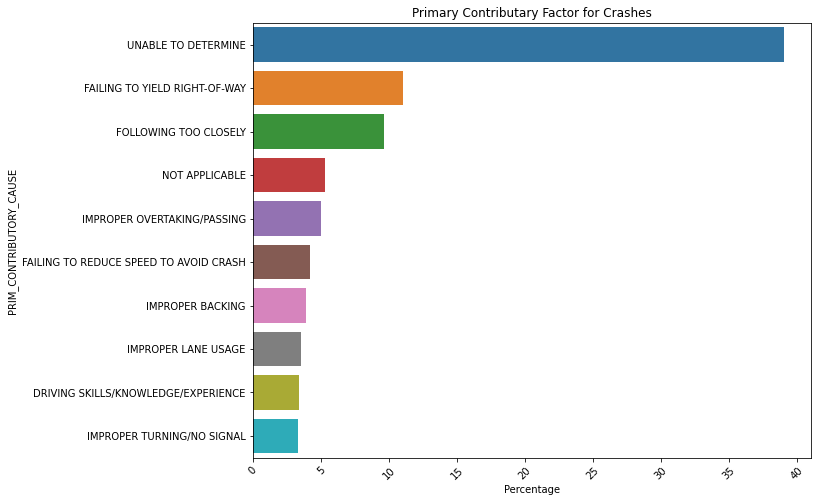

,PRIM_CONTRIBUTORY_CAUSE,count
0,UNABLE TO DETERMINE,39.076568
1,FAILING TO YIELD RIGHT-OF-WAY,11.041389
2,FOLLOWING TOO CLOSELY,9.666603
3,NOT APPLICABLE,5.271828
4,IMPROPER OVERTAKING/PASSING,4.979515
5,FAILING TO REDUCE SPEED TO AVOID CRASH,4.216522
6,IMPROPER BACKING,3.885349
7,IMPROPER LANE USAGE,3.547757
8,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,3.384521
9,IMPROPER TURNING/NO SIGNAL,3.351048


In [49]:
# Barplot of primary contributary factors of traffic crashes

top_10_causes = (deduplicated_df['PRIM_CONTRIBUTORY_CAUSE'].value_counts(normalize=True)*100).nlargest(10).reset_index()

top_10_causes.columns = ['PRIM_CONTRIBUTORY_CAUSE', 'count']

plt.subplots(figsize=(10,8))

sns.barplot(x='count', y='PRIM_CONTRIBUTORY_CAUSE', orient='h', data=top_10_causes)

plt.title('Primary Contributary Factor for Crashes')

plt.xticks(rotation=45)

plt.xlabel('Percentage')

plt.show()

top_10_causes

The horizontal barplot above shows the top 10 primary causes of traffic crashes as reported by the officer:

* `39%` of the traffic crashes reported, the reporting officer was unable to determine cause.

*  `5%` of the traffic crashes primary contributary factors were recorded as `NOT APPLICABLE`.

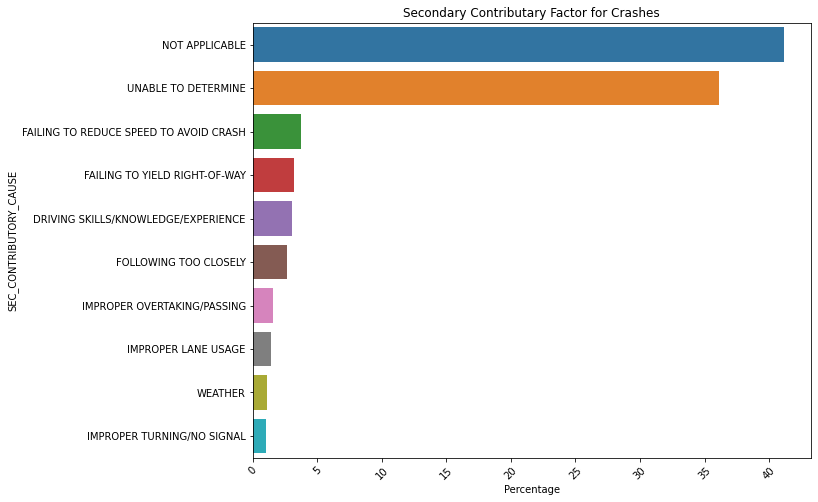

,SEC_CONTRIBUTORY_CAUSE,count
0,NOT APPLICABLE,41.180759
1,UNABLE TO DETERMINE,36.090165
2,FAILING TO REDUCE SPEED TO AVOID CRASH,3.701135
3,FAILING TO YIELD RIGHT-OF-WAY,3.198472
4,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,3.064811
5,FOLLOWING TOO CLOSELY,2.640671
6,IMPROPER OVERTAKING/PASSING,1.553727
7,IMPROPER LANE USAGE,1.407915
8,WEATHER,1.101044
9,IMPROPER TURNING/NO SIGNAL,1.037423


In [50]:
# Barplot of primary contributary factors of traffic crashes

top_10_causes = (deduplicated_df['SEC_CONTRIBUTORY_CAUSE'].value_counts(normalize=True)*100).nlargest(10).reset_index()

top_10_causes.columns = ['SEC_CONTRIBUTORY_CAUSE', 'count']

plt.subplots(figsize=(10,8))

sns.barplot(x='count', y='SEC_CONTRIBUTORY_CAUSE', orient='h', data=top_10_causes)

plt.title('Secondary Contributary Factor for Crashes')

plt.xticks(rotation=45)

plt.xlabel('Percentage')

plt.show()

top_10_causes

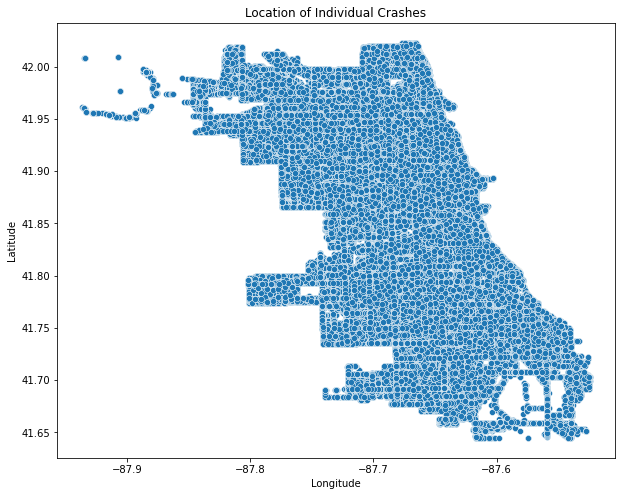

In [51]:
# Location distribution of crashes in Chicago

Location_df = deduplicated_df.drop(deduplicated_df[deduplicated_df['LATITUDE'] == 0].index)

plt.figure(figsize=(10, 8))

sns.scatterplot(data=Location_df, x='LONGITUDE', y='LATITUDE')

plt.title('Location of Individual Crashes')

plt.xlabel('Longitude')

plt.ylabel('Latitude')

plt.show()


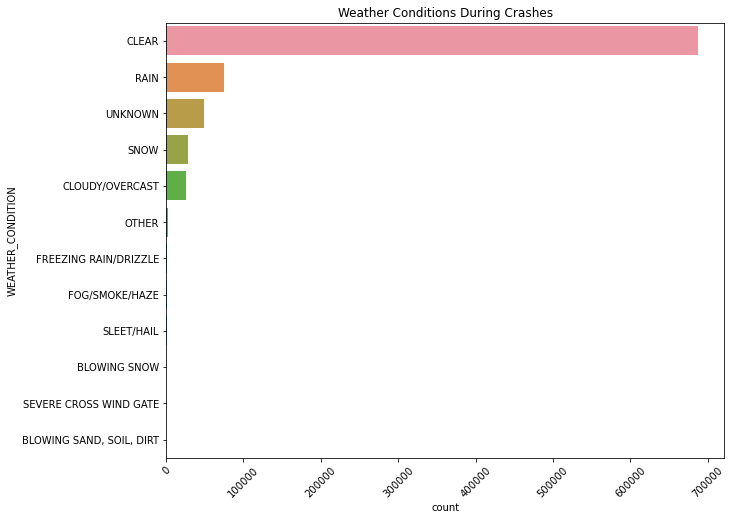

In [52]:
# Barplot of weather conditions

plt.subplots(figsize=(10,8))

sns.barplot(x=deduplicated_df['WEATHER_CONDITION'].value_counts(), y=deduplicated_df['WEATHER_CONDITION'].value_counts().index, orient='h')

plt.title('Weather Conditions During Crashes')

plt.xticks(rotation=45)

plt.show()

In [53]:
final_merged_df.dtypes

CRASH_RECORD_ID             object
WEATHER_CONDITION           object
LIGHTING_CONDITION          object
ROADWAY_SURFACE_COND        object
ROAD_DEFECT                 object
CRASH_TYPE                  object
DAMAGE                      object
PRIM_CONTRIBUTORY_CAUSE     object
SEC_CONTRIBUTORY_CAUSE      object
CRASH_HOUR                   int64
CRASH_DAY_OF_WEEK            int64
LATITUDE                   float64
LONGITUDE                  float64
CRASH_UNIT_ID                int64
MANEUVER                    object
VEHICLE_DEFECT              object
VEHICLE_USE                 object
VEHICLE_TYPE                object
PERSON_TYPE                 object
SEX                         object
AGE                        float64
INJURY_CLASSIFICATION       object
DRIVER_ACTION               object
PERSON_ID                   object
dtype: object

Split categorical and numerical columns in the merged dataset.

In [54]:
final_merged_df_categorical = final_merged_df.select_dtypes('object')

In [55]:
for column in [final_merged_df.select_dtypes('int64').columns]:

        final_merged_df[column] = final_merged_df[column].astype('float64')

final_merged_df_numerical = final_merged_df.select_dtypes('float64')

In [ ]:
deduplicated_df.columns

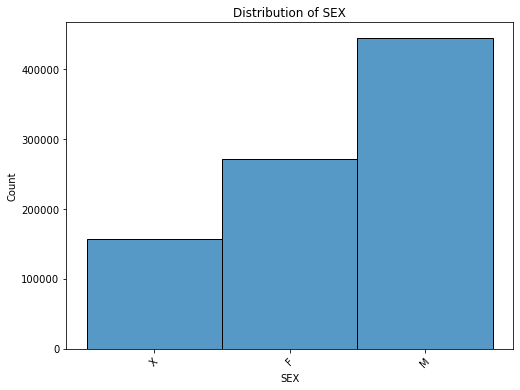

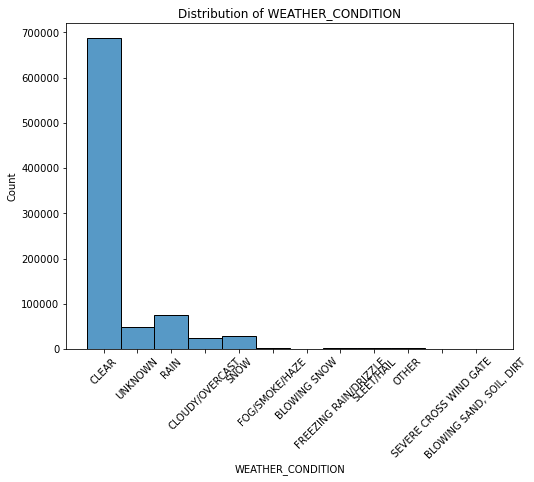

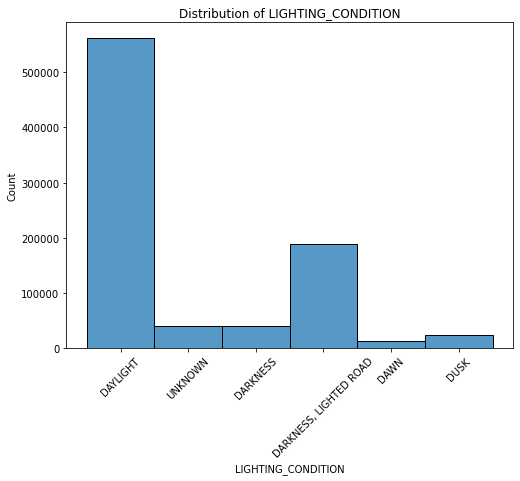

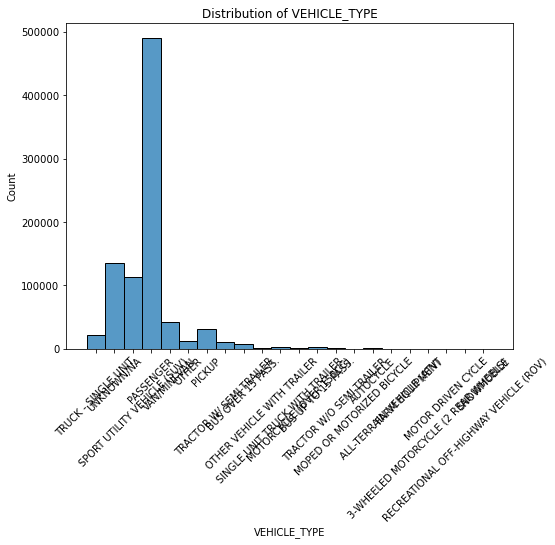

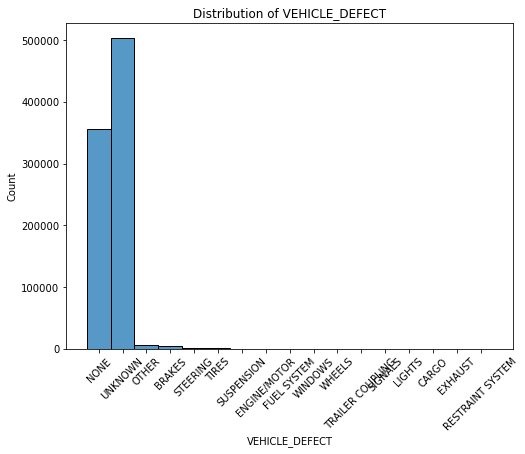

In [59]:
# plt.subplots(figsize=(10,8))

for column in deduplicated_df[['SEX', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'VEHICLE_TYPE', 'VEHICLE_DEFECT']].columns:

    plt.figure(figsize=(8, 6))

    sns.histplot(deduplicated_df[column])

    plt.title(f'Distribution of {column}')

    plt.xlabel(column)

    plt.ylabel('Count')

    plt.xticks(rotation=45)  # Rotate x-axis labels if needed

    plt.show()
